In [1]:
#imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import scipy as scpy
from scipy import stats
from scipy import ndimage
from skimage.transform import resize
import dionysus as d
import os
import csv
import pandas as pd
import seaborn as sns
import pickle
from sklearn.cluster import KMeans
from statannot import add_stat_annotation

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage import io

# This requires the helper_function.py file from:
# https://github.com/elstonlab/PodosomeImageAnalysis
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# %matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

from matplotlib.backends.backend_pdf import PdfPages

import matplotlib
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42
matplotlib.rcParams['font.sans-serif']="Arial"
matplotlib.rcParams['font.family']="sans-serif"
# matplotlib.rcParams.update({'font.size': 12})

#### Load in images and determine user inputs

### 5 um radii disks

In [2]:
#Load in 5 um radii disks
image_loc = 'FPRosetteImages/5umIgGDisks'

image_files = ['/2.czi_ROI-1_actin.tif','/4.czi_ROI-0_actin.tif','/6.czi_ROI-0_actin.tif',
               '/7.czi_ROI-0_actin.tif','/7.czi_ROI-1_actin.tif','/10.czi_ROI-0_actin.tif',
               '/16.czi_ROI-0_actin.tif','/16.czi_ROI-1_actin.tif']


images = [io.imread(image_loc+file) for file in image_files]

In [375]:
## define pixel and feature sizes
pix_size = 34.26/260

pod_feature_size = 0.3 #um
site_feature_size = 6 #um


#### Run images through persistent homology pipeline to discover podosome and phagocytosis site locations
1. Perform persistent homology (see helper_functions.py) to find significant critical points within images.
2. Perform processing of the candidate significantly persistent features. For this step, several things are done (check out cluster_refine_pods_and_sites() in helper_functions.py). Essentially, make sure that we only keep podosomes associated with a well-defined site, that these sites have 3 or more podosomes, and that the site centers are centered based on their associated podosomes.

In [376]:
image_stacks = []

all_pods_pre_ref = []
all_sites_pre_ref = []
all_clusters = []
all_centers = []

for image in images:

#     pix_size = pix_size
    len_micron = int(1/pix_size)
    pod_filt = int(pod_feature_size*len_micron)
    site_filt = int(site_feature_size*len_micron)

    pods, sites = find_pod_and_sites_ph(image,pod_filt,site_filt,plot_bool=False,plot_pers=False,save_file = '')
    clusters,centers,radii = cluster_refine_pods_and_sites(pods,sites,image,pix_size,plot_bool=False,save_file = '',upper_lim=7,lower_lim=4)

    all_pods_pre_ref.append(pods)
    all_sites_pre_ref.append(sites)
    all_clusters.append(clusters)
    all_centers.append(centers)


#### Save and/or load results. Visualize results.

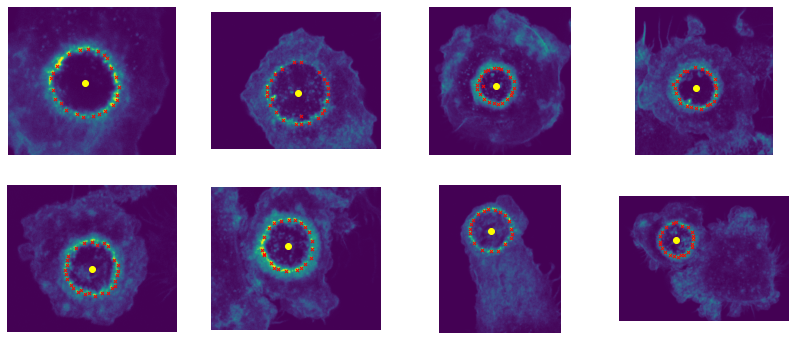

In [263]:
fig, axs = plt.subplots(2,4,figsize=(14,6))

for i in range(len(images)):
    axs[i//4,i%4].imshow(images[i])
    axs[i//4,i%4].scatter(all_clusters[i].T[0],all_clusters[i].T[1],color='red',marker='x',
                          s=10,linewidths=1)
    axs[i//4,i%4].scatter(all_centers[i].T[0],all_centers[i].T[1],color='yellow')
    axs[i//4,i%4].axis('off')
    
# plt.savefig('PodosomeCounts_10um_Disk.pdf',bbox_inches='tight',dpi=300)
# plt.savefig('PodosomeCounts_10um_Disk.png',bbox_inches='tight',dpi=300)

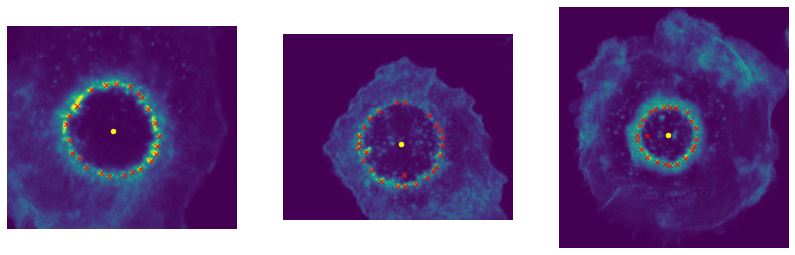

In [380]:
fig, axs = plt.subplots(1,3,figsize=(14,6))

for i in range(len(images[-3:])):
    axs[i].imshow(images[i])
    axs[i].scatter(all_clusters[i].T[0],all_clusters[i].T[1],color='red',marker='x',
                          s=20,linewidths=1)
    axs[i].scatter(all_centers[i].T[0],all_centers[i].T[1],color='yellow',s=20)
    axs[i].axis('off')
    
# plt.savefig('PodosomeCounts_10um_Disk_3Ex.pdf',bbox_inches='tight',dpi=300)
# plt.savefig('PodosomeCounts_10um_Disk_3Ex.png',bbox_inches='tight',dpi=300)

In [205]:
#Counts for 5 um radii disks

[len(c[0]) for c in all_clusters]

[24, 25, 23, 24, 28, 22, 19, 22]

### 1.75 um radii disks

In [11]:
#Load images for 1.75 um radii disks

image_loc = 'FPRosetteImages/175umIgGDisks/'
file_name = image_loc
path, dirs, files = os.walk(file_name).__next__()
len_files = len(files)-1

image_files = [file for file in files if '488' in file]

images = [io.imread(image_loc+file) for file in image_files]

# image_loc = '../../../SH-CH/talin_actin/'
file_name = image_loc
path, dirs, files = os.walk(file_name).__next__()
len_files = len(files)-1

image_files2 = [file for file in files if '560' in file]

images2 = [io.imread(image_loc+file) for file in image_files2]

all_images = images
for image in images2:
    all_images.append(image)

In [355]:
#Define pixel and feature sizes
pix_size = 41.47/1024
pod_feature_size = 0.3 #um
site_feature_size = 1.5 #um


In [356]:
#Find podosomes and sites using PH-based pipeline

all_clusters = []
all_centers=[]

for image in images:

#     pix_size = pix_size
    len_micron = int(1/pix_size)
    pod_filt = int(pod_feature_size*len_micron)
    site_filt = int(site_feature_size*len_micron)

    pods, sites = find_pod_and_sites_ph(image,pod_filt,site_filt,plot_bool=False,plot_pers=False,save_file = '')
    clusters,centers,radii = cluster_refine_pods_and_sites(pods,sites,image,pix_size,plot_bool=False,save_file = '',upper_lim=2.5,lower_lim=1.5)

    all_clusters.append(clusters)
    all_centers.append(centers)

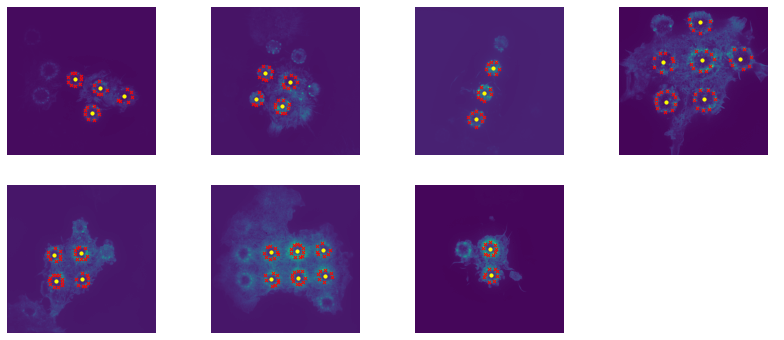

In [364]:
fig, axs = plt.subplots(2,4,figsize=(14,6))

counts_175 = []

for j in range(len(images)):
    axs[j//4,j%4].imshow(images[j])
    centers = all_centers[j]
    clusters = all_clusters[j]
    
    for i in range(len(centers)):
        axs[j//4,j%4].scatter(clusters[i].T[0],clusters[i].T[1],color='red',marker='x',
                          s=10,linewidths=1)
        axs[j//4,j%4].scatter(centers[i].T[0],centers[i].T[1],color='yellow',s=10)
        counts_175.append(len(clusters[i]))

    axs[j//4,j%4].axis('off')
    
axs[1,3].axis('off')
    
# plt.savefig('PodosomeCounts_1.75um_Disk.pdf',bbox_inches='tight',dpi=300)
# plt.savefig('PodosomeCounts_1.75um_Disk.png',bbox_inches='tight',dpi=300)

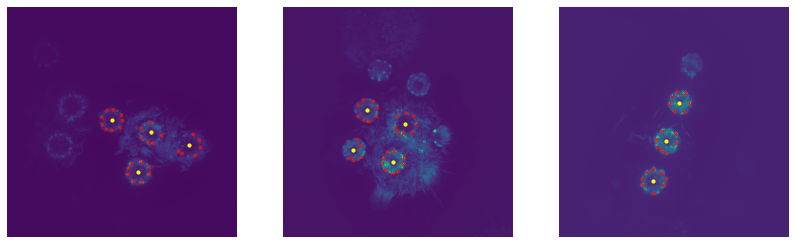

In [372]:
fig, axs = plt.subplots(1,3,figsize=(14,6))

counts_175 = []

for j in range(len(images[-3:])):
    axs[j].imshow(images[j])
    centers = all_centers[j]
    clusters = all_clusters[j]
    
    for i in range(len(centers)):
        axs[j].scatter(clusters[i].T[0],clusters[i].T[1],color='red',marker='x',
                          s=10,linewidths=1)
        axs[j].scatter(centers[i].T[0],centers[i].T[1],color='yellow',s=10)
        counts_175.append(len(clusters[i]))

    axs[j].axis('off')
    
# plt.savefig('PodosomeCounts_1.75um_Disk_3Ex.pdf',bbox_inches='tight',dpi=300)
# plt.savefig('PodosomeCounts_1.75um_Disk_3Ex.png',bbox_inches='tight',dpi=300)

In [361]:
# Counts for 1.75 um radii disks
np.array(counts_175).flatten()

array([ 9,  6,  8,  6,  9,  8,  8,  5,  7,  7,  8,  9, 11,  6,  7,  8,  9,
        8,  9, 11,  8, 10,  7,  9,  8,  7, 10,  9,  8])